# Task 3: Classification & Neural Networks

In this task you are required to apply a variety of machine learning algorithms to the dataset `nba_rookie_data.csv` which can be downloaded from the assignment
task on canvas. This data set contains NBA rookie performance with target variable **Target_5Yrs** with 1: if career length >= 5 yrs or 0: if career length < 5 yrs. <br>

The classification problem here is to predict if a player will last 5 years in the NBA. Apply **Logistic Regression, Gaussian Naive Bayes and construct Neural Networks**. After developing the various models you should also analyse the results and discuss the effectiveness of the models, outlining the improvements when developing the models and compare the approaches/algorithms used (strengths and weaknesses).

## Data Preparation

#### Importing libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context="talk")

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer

import tensorflow as tf

import warnings
warnings.filterwarnings(action='ignore')

#### Loading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
url = ('/content/drive/My Drive/Datasets/nba-rookie-data.csv')
df = pd.read_csv(url)
# display all columns
pd.set_option('display.max_columns', None)
df.head()

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


#### Exploring Data

**Meaning of Columns in the dataset** <br>

1. **Name:** This is the name of the NBA rookie player.

2. **Games Played:** The number of games the player participated in during their rookie season.

3. **Minutes Played:** The total number of minutes the player spent on the court during their rookie season.

4. **Points Per Game:** The average number of points the player scored in each game during their rookie season.

5. **Field Goals Made:** The total number of field goals (two-point shots) successfully made by the player.

6. **Field Goal Attempts:** The total number of field goal attempts (two-point shots) taken by the player.

7. **Field Goal Percent:** The percentage of field goals made, calculated as (Field Goals Made / Field Goal Attempts).

8. **3 Point Made:** The total number of three-point shots made by the player.

9. **3 Point Attempt:** The total number of three-point shot attempts by the player.

10. **3 Point Percent:** The percentage of three-point shots made, calculated as (3 Point Made / 3 Point Attempt).

11. **Free Throw Made:** The total number of free throws made by the player.

12. **Free Throw Attempts:** The total number of free throw attempts by the player.

13. **Free Throw Percent:** The percentage of free throws made, calculated as (Free Throw Made / Free Throw Attempts).

14. **Offensive Rebounds:** The number of offensive rebounds (collecting the ball on offense) by the player.

15. **Defensive Rebounds:** The number of defensive rebounds (collecting the ball on defense) by the player.

16. **Rebounds:** The total number of rebounds (offensive + defensive) by the player.

17. **Assists:** The number of assists made by the player (passing the ball to a teammate leading to a score).

18. **Steals:** The number of steals by the player (taking the ball away from an opponent).

19. **Blocks:** The number of shots blocked by the player.

20. **Turnovers:** The number of turnovers committed by the player (losing possession of the ball to the opponent).

21. **TARGET_5Yrs:** This is the target variable and the outcome variable for the analysis. It could represent whether or not a player had a successful career in the NBA, typically defined as playing for at least 5 years. It may be binary (0 or 1) where 1 means the player had a successful career and 0 means they did not.

In [4]:
# dimension of data
print(df.shape)
# summary of data
df.info()

(1340, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 1340 non-null   object 
 1   Games Played         1340 non-null   int64  
 2   Minutes Played       1340 non-null   float64
 3   Points Per Game      1340 non-null   float64
 4   Field Goals Made     1340 non-null   float64
 5   Field Goal Attempts  1340 non-null   float64
 6   Field Goal Percent   1340 non-null   float64
 7   3 Point Made         1340 non-null   float64
 8   3 Point Attempt      1340 non-null   float64
 9   3 Point Percent      1329 non-null   float64
 10  Free Throw Made      1340 non-null   float64
 11  Free Throw Attempts  1340 non-null   float64
 12  Free Throw Percent   1340 non-null   float64
 13  Offensive Rebounds   1340 non-null   float64
 14  Defensive Rebounds   1340 non-null   float64
 15  Rebounds             1340 n

#### Checking for missing values

In [6]:
# checking for missing values
missing_val = pd.concat([df.isnull().sum(), (df.isnull().mean() * 100).round(2)], axis=1, keys=['Total', 'Percentage of Missing Values (%)'])
missing_val = missing_val[missing_val['Total'] > 0].sort_values(by='Total', ascending=False)
print('Checking for null values in the dataset')
missing_val

Checking for null values in the dataset


,Total,Percentage of Missing Values (%)
3 Point Percent,11,0.82


#### Checking for duplicates

In [7]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True, ignore_index=True)

12


In [8]:
# Generate descriptive statistics
df.describe()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.00000,1318.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,60.411145,17.634413,6.804217,2.630271,5.885542,44.184639,0.247741,0.77869,19.322989,1.298117,1.822139,70.325226,1.009714,2.027636,3.036446,1.551205,0.619051,0.368675,1.193599,0.620482
std,17.416688,8.322560,4.361669,1.684918,3.595394,6.132759,0.384548,1.06351,16.045404,0.987329,1.322653,10.562158,0.777551,1.362236,2.060241,1.475731,0.410972,0.429680,0.723966,0.485450
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.00000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.30000,22.450000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.12500,32.575000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.50000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


## Exploratory Data Analysis
In the Exploratory Data Analysis (EDA) section, the dataset will be investigated and its main features summarized. The primary goal of EDA is to help understand and summarize the contents of a dataset, typically with a specific question in mind, or to prepare for more advanced statistical modeling in future stages of data analysis

In [9]:
# Setting Custom colors
my_colors = ["#ff6e54", "#ffa600", "#ff2e63", "#a3f7bf", "#9378ff", "#56e39f", "#ff67ab", "#5e2ca5", "#ffd166", "#00b4d8", "#4ecdc4", "#f8edeb"]

# Create a seaborn palette object
my_palette = sns.color_palette(my_colors)

# Use the custom palette with a seaborn function
sns.set_palette(my_palette)

from matplotlib.colors import ListedColormap
colors = ['#ffc3a0', '#ffafcc', '#bde0fe', '#ffabab']
my_cmap = sns.color_palette(colors)
cmap = ListedColormap(colors)

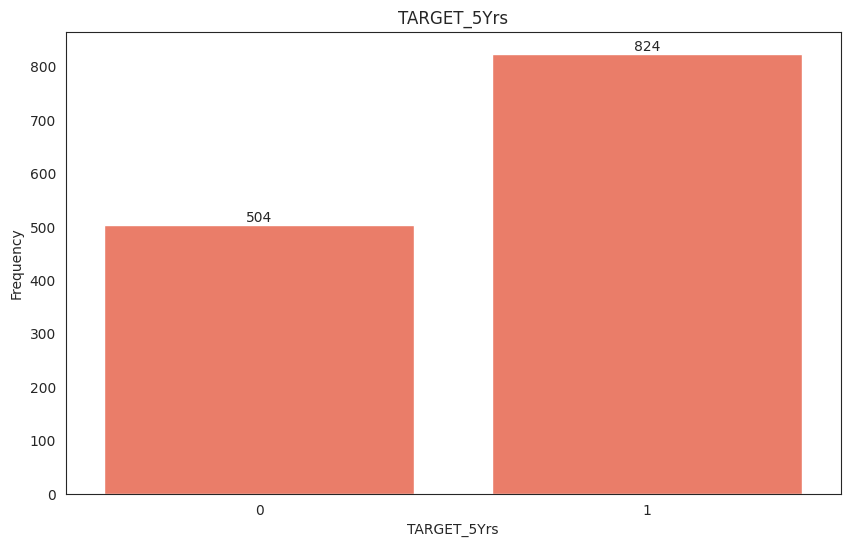

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x=df['TARGET_5Yrs'], color=my_colors[0])
ax.set_title('TARGET_5Yrs')
ax.set_ylabel('Frequency')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show();

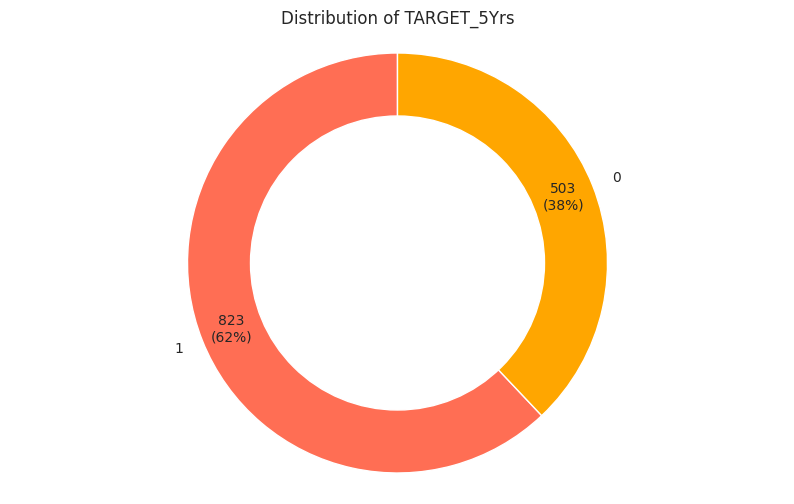

In [11]:
# Distribution of TARGET_5Yrs
count_data = df['TARGET_5Yrs'].value_counts()
total_count = len(df)

plt.figure(figsize=(10, 6))
plt.pie(count_data, labels=count_data.index, autopct=lambda p: f'{int(p * total_count / 100)}\n({p:.0f}%)', startangle=90, pctdistance=0.85,
        wedgeprops={'width': 0.4, 'edgecolor': 'w'})

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of TARGET_5Yrs')
plt.axis('equal')
plt.show();

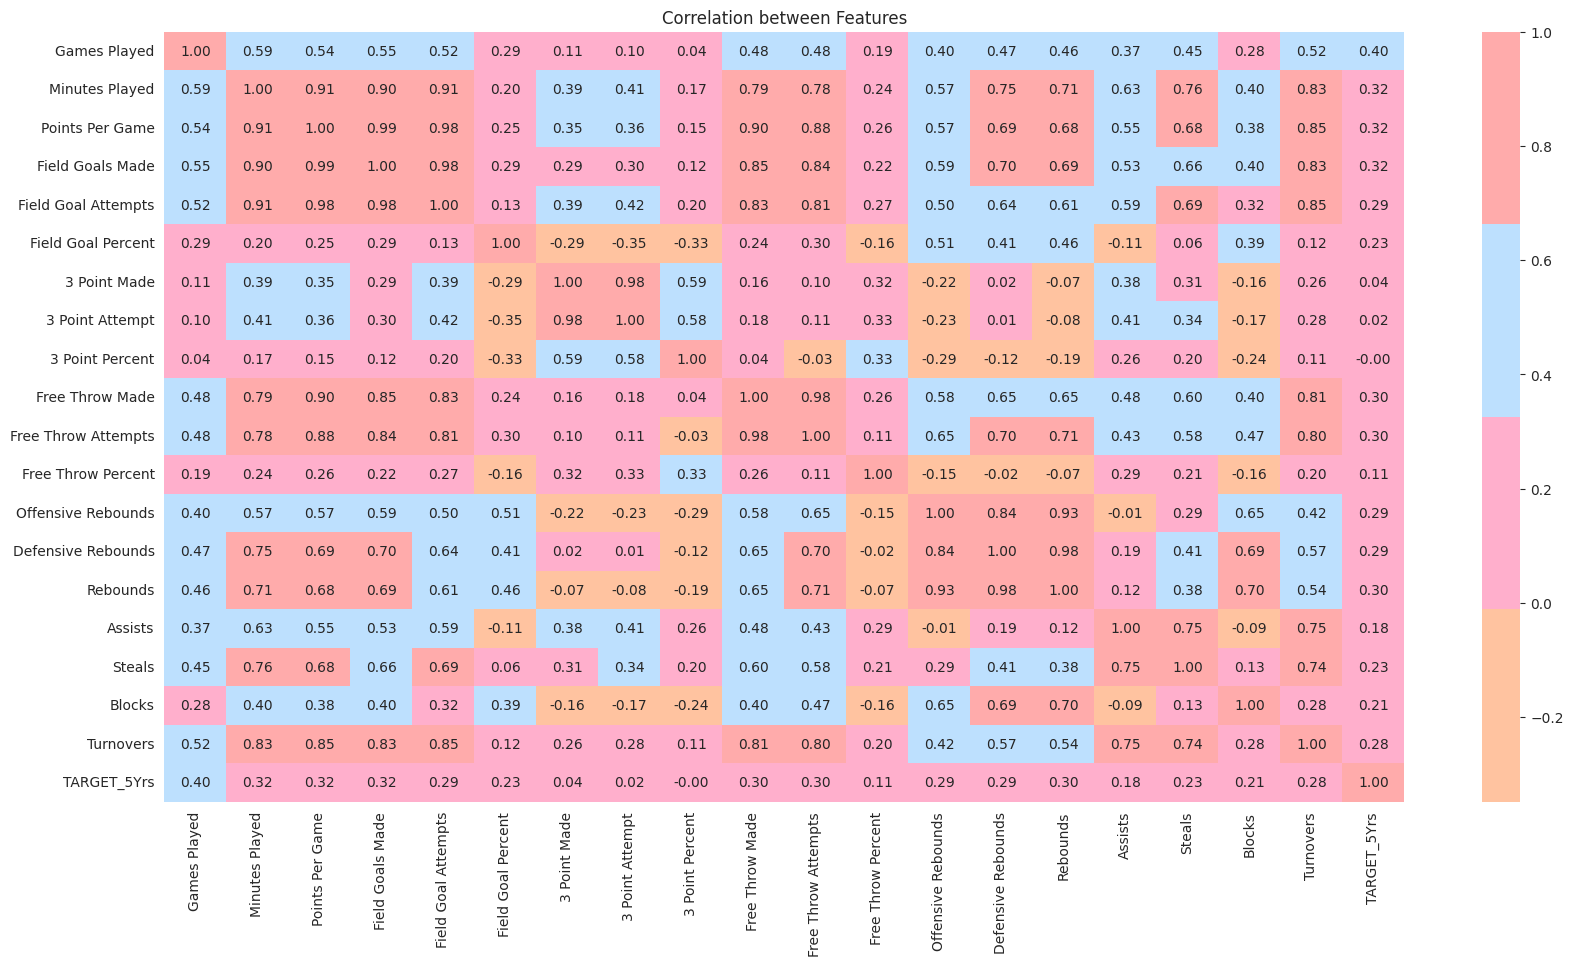

In [12]:
# correlation between features
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=cmap, fmt='.2f').set(title='Correlation between Features')
plt.show;

In [13]:
# get input and output data
X = df.drop(['Name', 'TARGET_5Yrs'], axis=1)
y = df['TARGET_5Yrs']

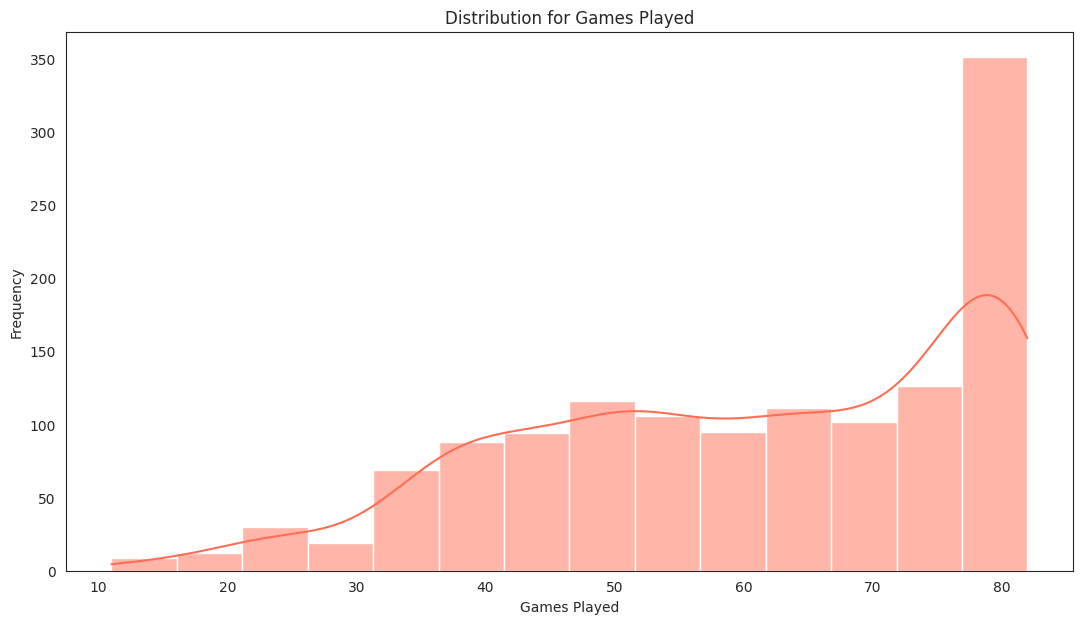

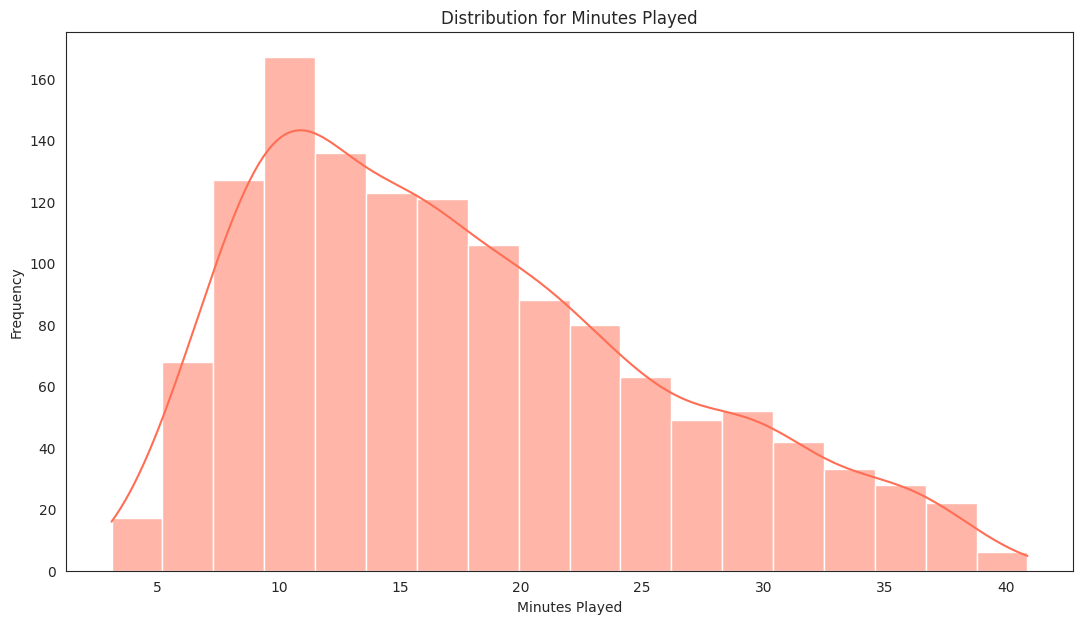

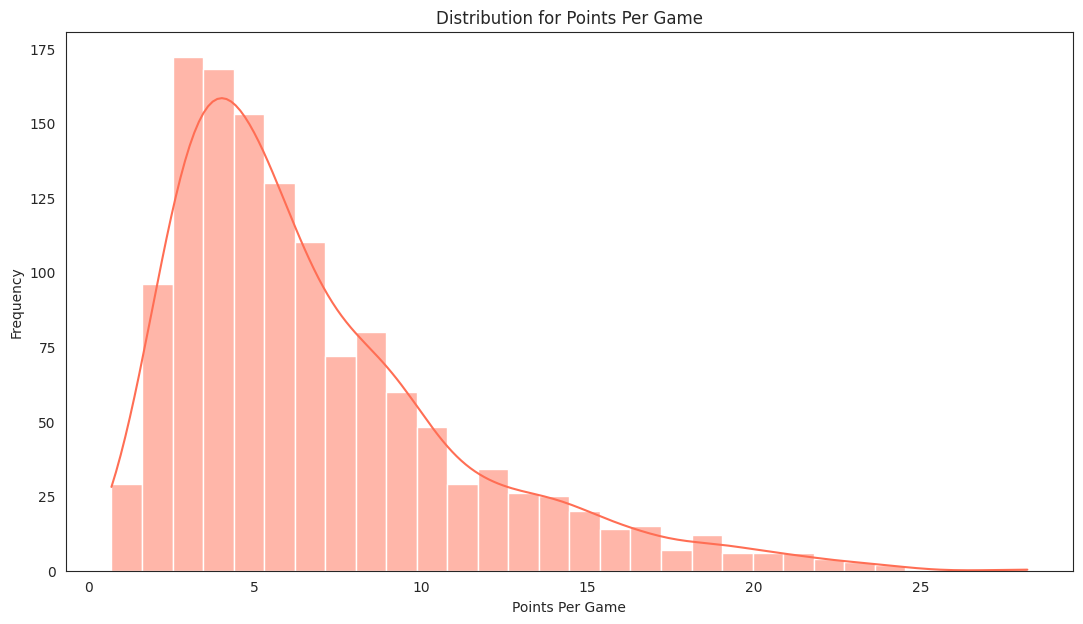

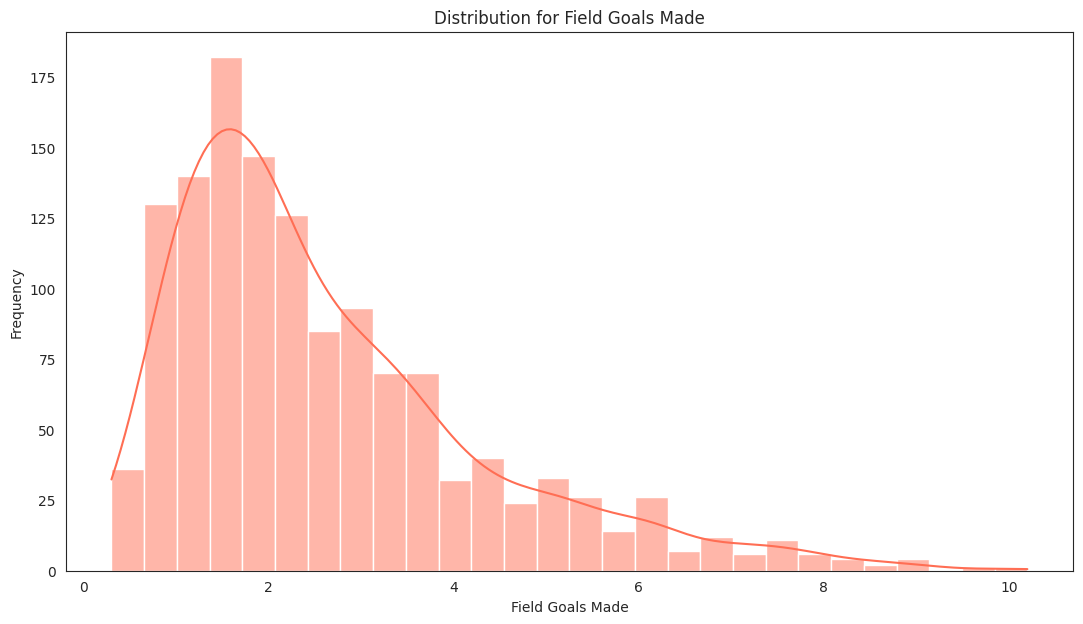

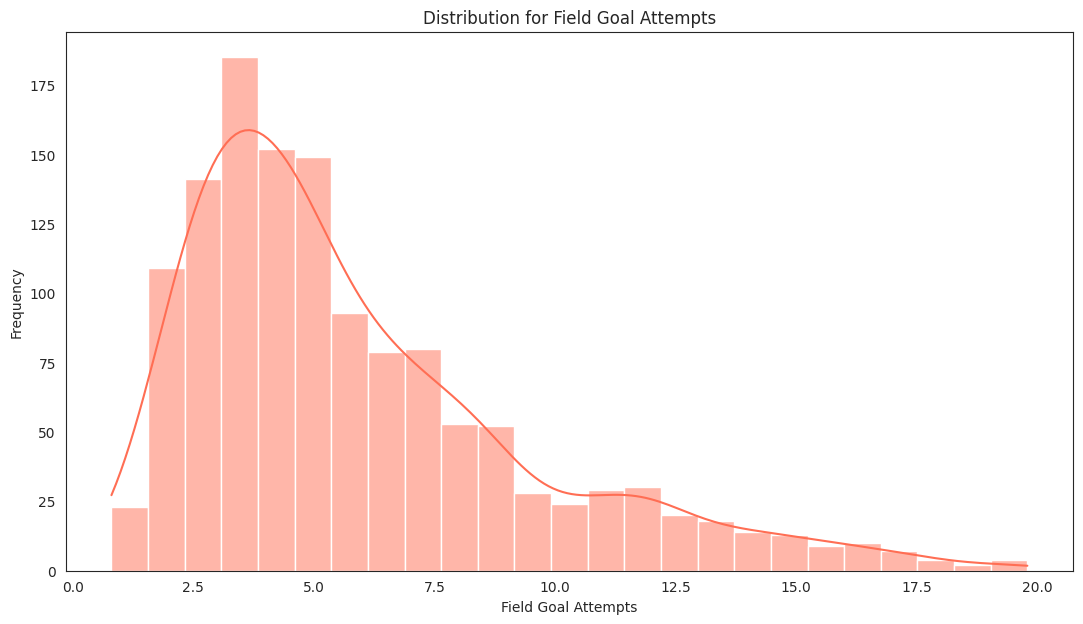

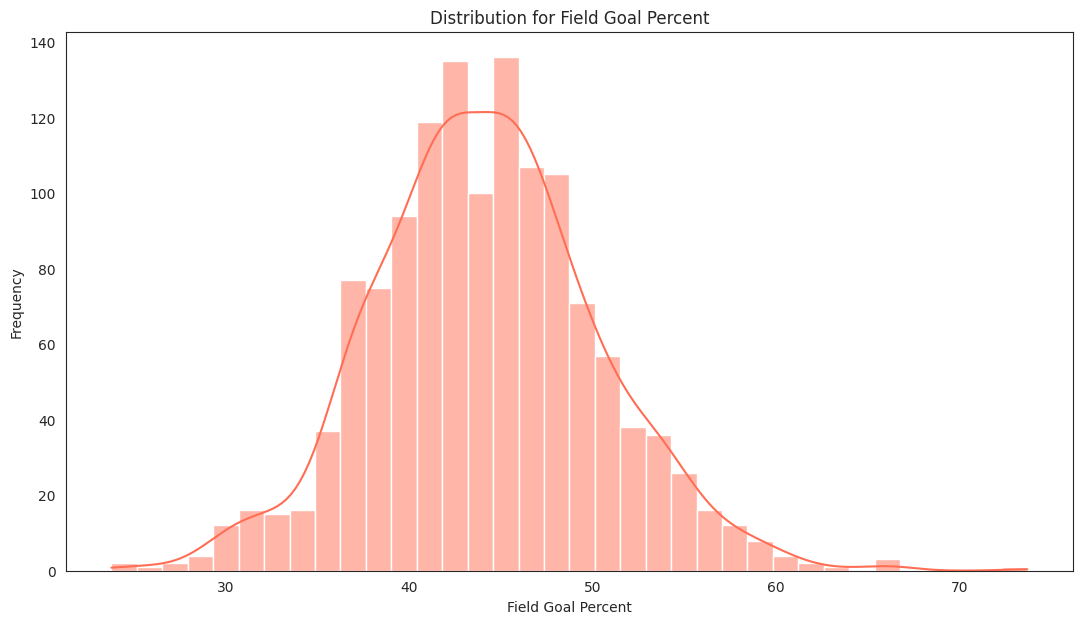

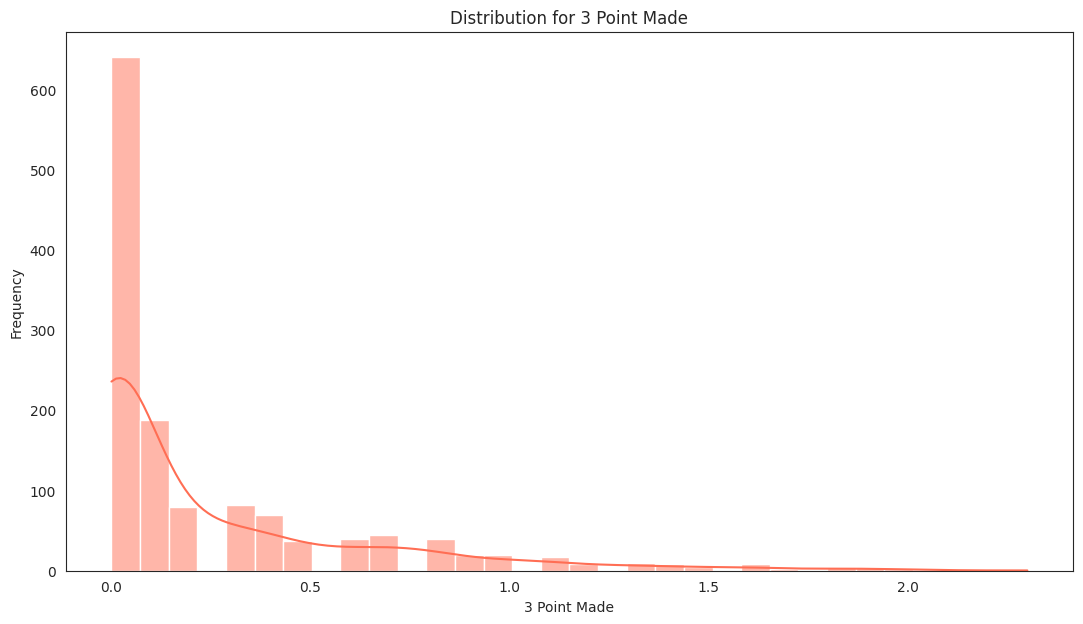

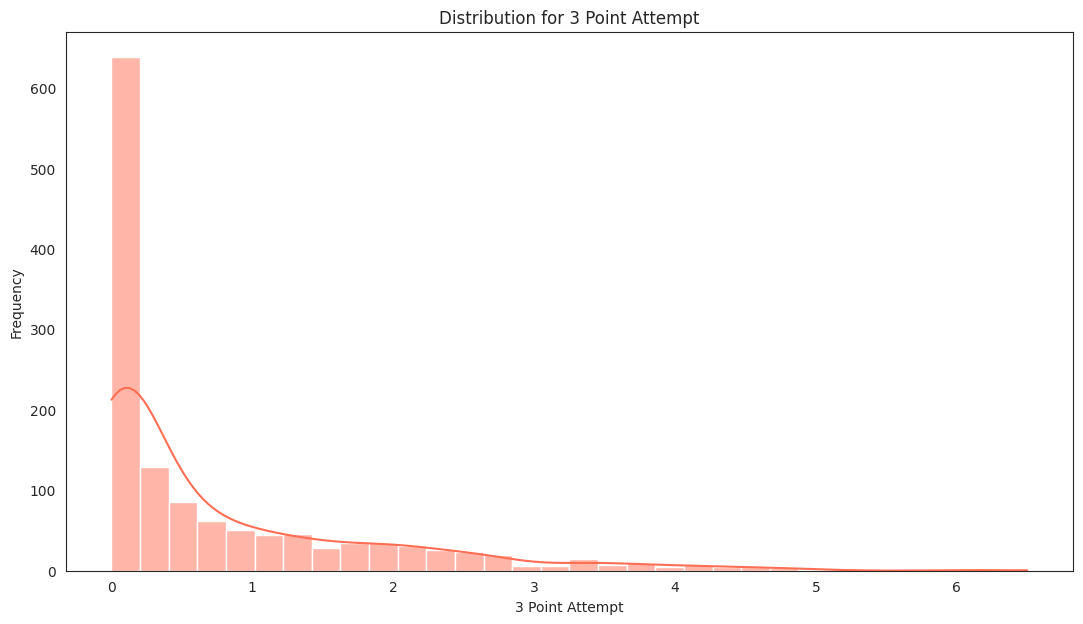

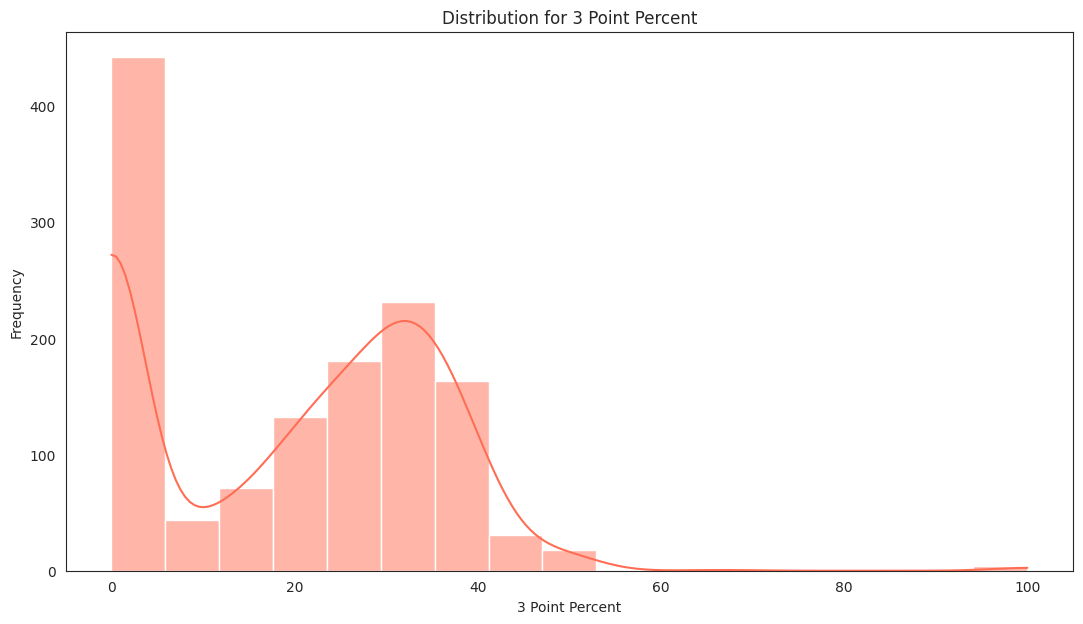

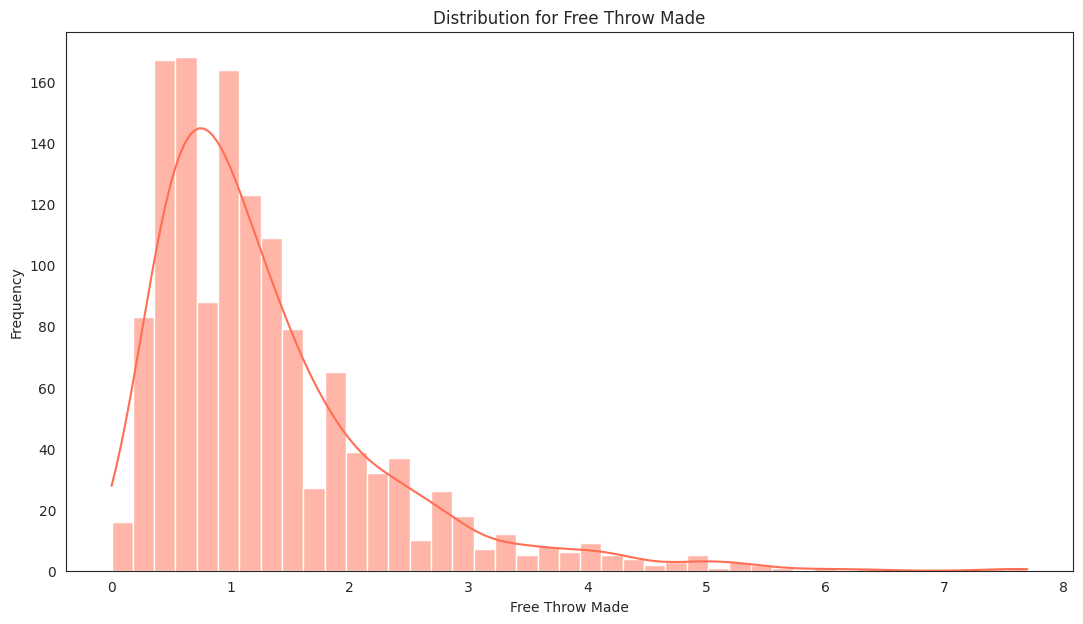

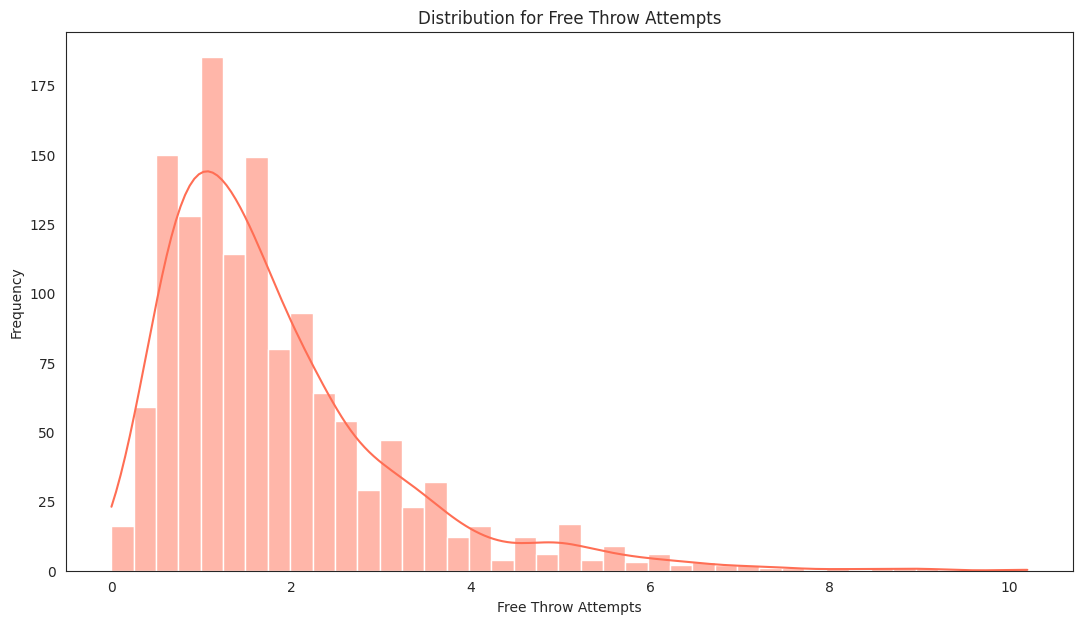

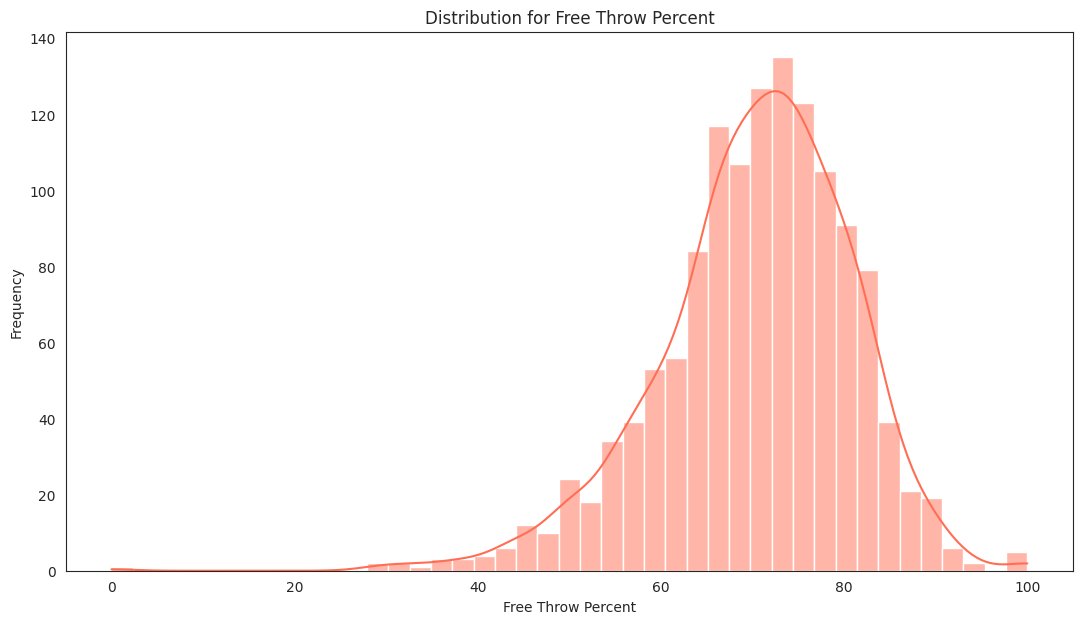

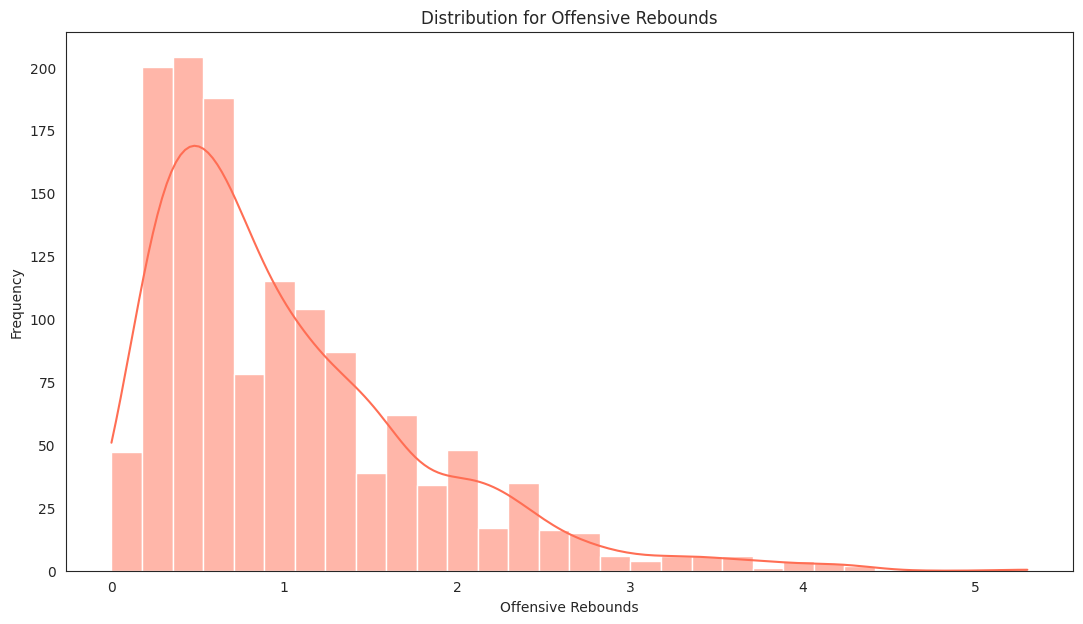

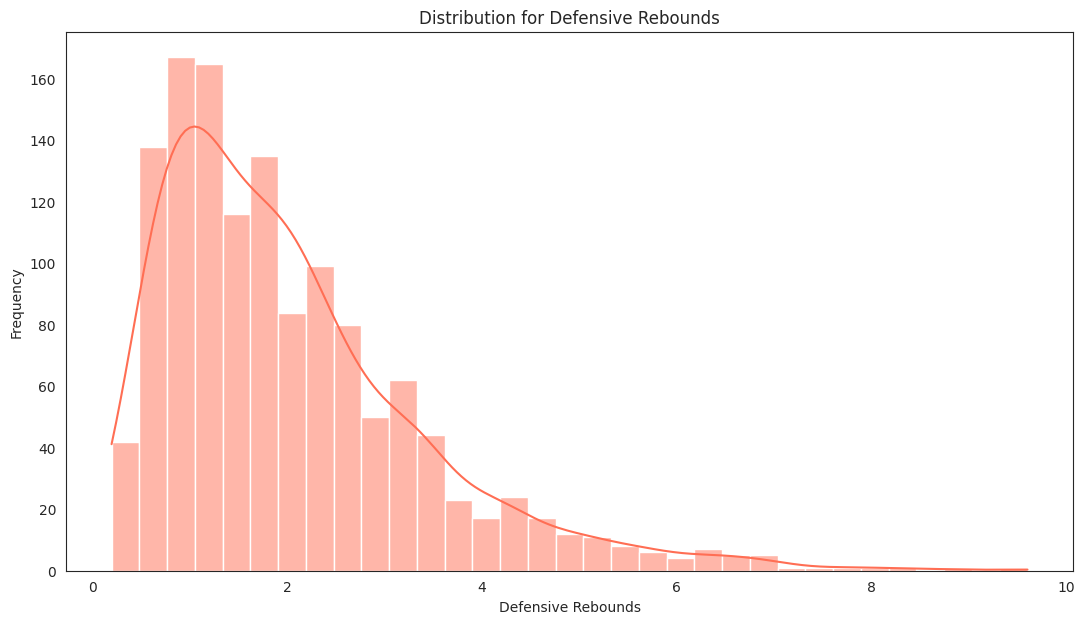

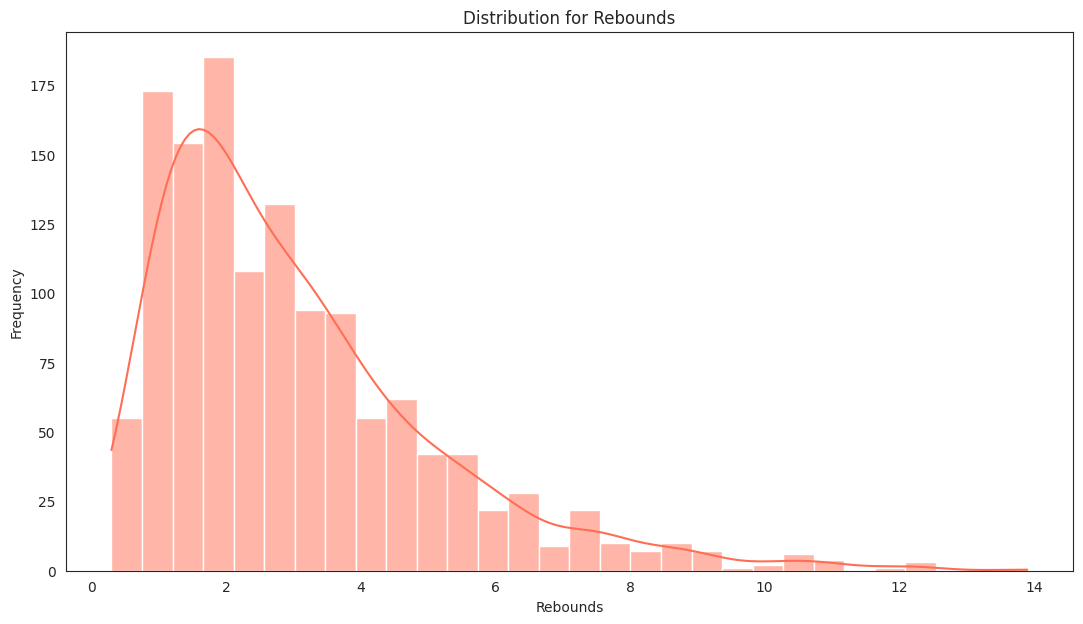

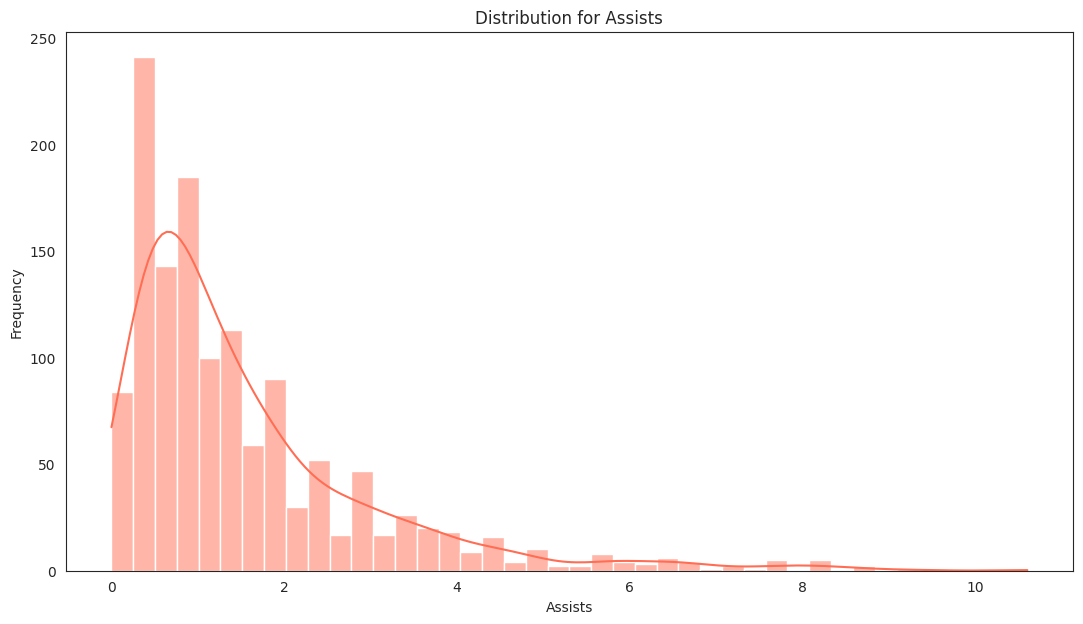

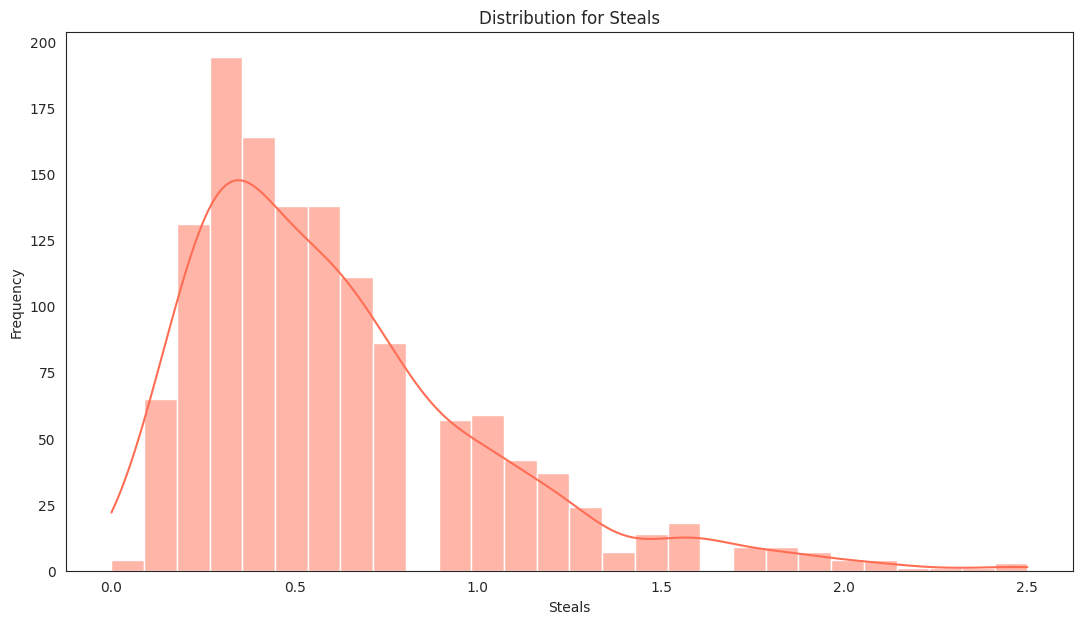

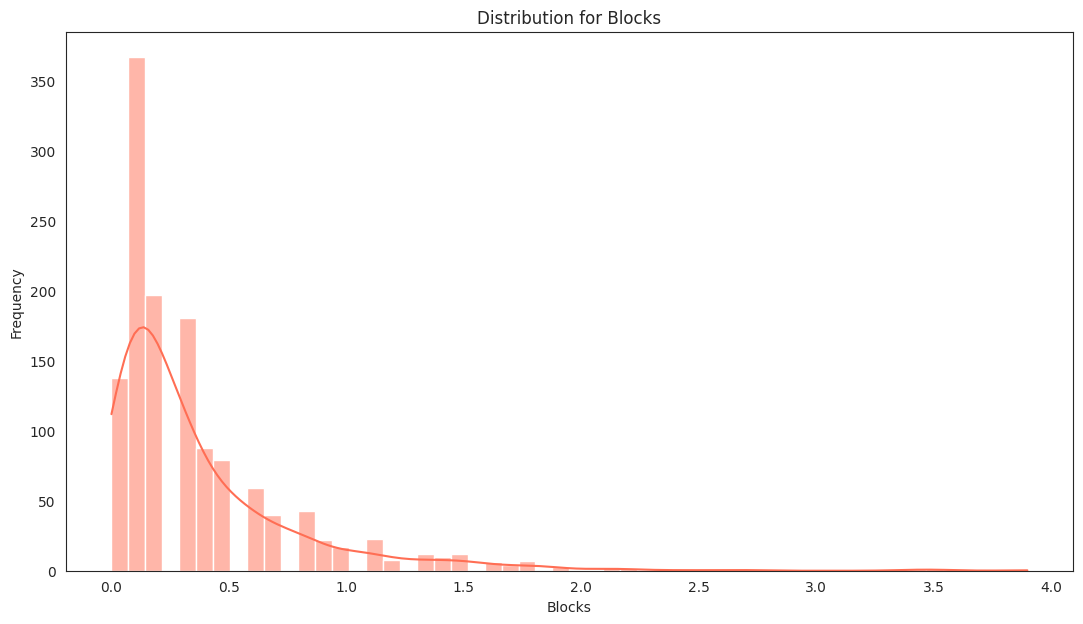

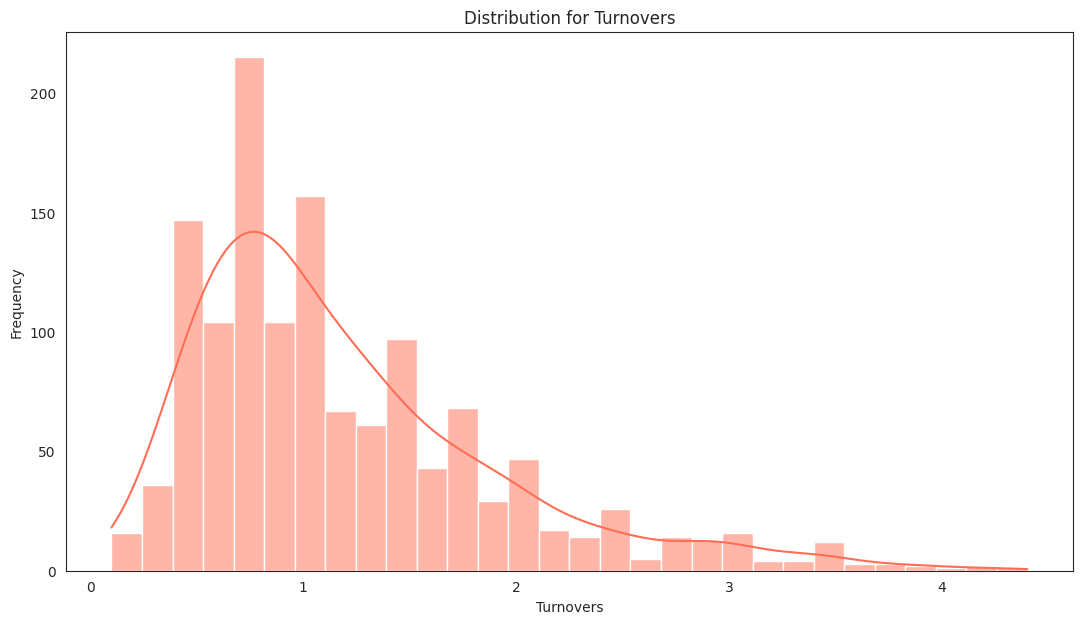

In [14]:
# distribution of features
for col in X.select_dtypes(include='number').columns:
    plt.figure(figsize=(13, 7))
    sns.histplot(x=col, data=df, kde=True)
    plt.title(f'Distribution for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [15]:
print('The categorical features are:\n {}'.format(df.select_dtypes(exclude='number').columns.tolist()))
print('The numerical features are:\n {}'.format(df.select_dtypes(include='number').columns.tolist()))

The categorical features are:
 ['Name']
The numerical features are:
 ['Games Played', 'Minutes Played', 'Points Per Game', 'Field Goals Made', 'Field Goal Attempts', 'Field Goal Percent', '3 Point Made', '3 Point Attempt', '3 Point Percent', 'Free Throw Made', 'Free Throw Attempts', 'Free Throw Percent', 'Offensive Rebounds', 'Defensive Rebounds', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 'TARGET_5Yrs']


## Model Training

### 1. Logistic Regression

The algorithm used initially is the Logistic Regression. <br>
Logistic regression is a machine learning algorithm used for classification problems. It predicts the probability of a binary outcome, such as whether or notwhether or not a player had a successful career in the NBA, typically defined as playing for at least 5 years. It may be binary (0 or 1) where 1 means the player had a successful career and 0 means they did not.

Here is a short overview of logistic regression:

- Logistic regression is a classification algorithm. This means that it is used to predict the class of a new data point, such as whether it is spam or not.
- Logistic regression predicts the probability of a binary outcome. This means that it outputs a value between 0 and 1, which represents the probability of the data point belonging to the positive class.
- Logistic regression works by fitting a linear function to the data. This linear function takes the input features as input and outputs a score.
- Logistic regression then uses the sigmoid function to convert the output of the linear function to a probability. The sigmoid function is a non-linear function that maps the output of the linear function to a value between 0 and 1.

In [16]:
# get input and output data
X = df.drop(['Name', 'TARGET_5Yrs'], axis=1)
y = df['TARGET_5Yrs']

In [17]:
# Define the numerical feature names
num_cols = X.columns

# Create a numerical pipeline for scaling and missing value imputation
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

# Combining the numerical pipeline with a column transformer
full_pipeline = ColumnTransformer(
    transformers=[
        ('numeric', num_pipeline, num_cols)
    ]
)

# Fitting the pipeline
X_ = full_pipeline.fit_transform(X)

# Create a DataFrame with the correct column names
X = pd.DataFrame(X_, columns=num_cols)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=101, test_size=0.3)

In [19]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(929, 19) (929,)
(399, 19) (399,)


In [20]:
# Define pipeline with preprocessing and logistic regression model
pipeline_log = Pipeline([
    ('logistic_regression', LogisticRegression()),
])

# Fit the data and generate predictions
pipeline_log.fit(X_train, y_train)
y_pred_log = pipeline_log.predict(X_test)

In [21]:
# Define pipeline with preprocessing and logistic regression model
pipeline_log = Pipeline([
    ('logistic_regression', LogisticRegression()),
])

# Fit the data and generate predictions
pipeline_log.fit(X_train, y_train)
y_pred_log = pipeline_log.predict(X_test)

In [22]:
# accuracy score
acc_score_log = accuracy_score(y_test, y_pred_log)

# print the f-2 score
print(f'Accuracy score of logistic regression classifier: {acc_score_log}')

Accuracy score of logistic regression classifier: 0.7117794486215538


##### **Feature Selection**
Here, we try to identify the most important features that have a significant impact on the target variable, `TARGET_5Yrs`.
Four different methods of feature selection was used.

1.   Recursive Feature Addition (RFE): RFE works by recursively removing the least important features based on a model (e.g., a classifier) and selecting the most important features.

In [23]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# Initialize RFE
rfe = RFE(model, n_features_to_select=15)
# Fit RFE
fit = rfe.fit(X, y)

# Get the indices of the selected features
selected_indices = rfe.get_support(indices=True)
# Get the names of the selected features
list1_selected_features = X.columns[selected_indices]
list1_selected_features

Index(['Games Played', 'Minutes Played', 'Points Per Game', 'Field Goals Made',
       'Field Goal Attempts', 'Field Goal Percent', '3 Point Percent',
       'Free Throw Made', 'Free Throw Attempts', 'Free Throw Percent',
       'Offensive Rebounds', 'Defensive Rebounds', 'Rebounds', 'Assists',
       'Turnovers'],
      dtype='object')

2.   Feature Importance-based Selection: This involves using an ensemble model (like a Random Forest) to determine feature importance and selecting the most important features.

In [24]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest, f_classif

# Select the best k features using f_regression scores
k = 15
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)
# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)
# Get the names of the selected features
list2_selected_features = X.columns[selected_indices]
list2_selected_features

Index(['Games Played', 'Minutes Played', 'Points Per Game', 'Field Goals Made',
       'Field Goal Attempts', 'Field Goal Percent', 'Free Throw Made',
       'Free Throw Attempts', 'Offensive Rebounds', 'Defensive Rebounds',
       'Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers'],
      dtype='object')

3. Mutual Information-based Selection: Mutual information measures the dependency between variables and can be used for feature selection.

In [25]:
# Train a random forest classifier to get feature importances
model = RandomForestClassifier()
model.fit(X, y)
# Get the feature importances
importances = model.feature_importances_
# Sort the features by importance score
indices = importances.argsort()[::-1]
# Select the top k features based on their importance scores
k = 15
selected_indices = indices[:k]
# Get the names of the selected features
list3_selected_features = X.columns[selected_indices]
list3_selected_features

Index(['Games Played', 'Field Goal Percent', 'Minutes Played',
       'Free Throw Percent', 'Field Goals Made', 'Points Per Game',
       'Free Throw Made', 'Field Goal Attempts', 'Rebounds',
       'Free Throw Attempts', 'Defensive Rebounds', 'Offensive Rebounds',
       'Assists', '3 Point Percent', 'Turnovers'],
      dtype='object')

4. Correlation-based Feature Selection: This technique involves selecting features that have a high correlation with the target variable.

In [26]:
from sklearn.feature_selection import mutual_info_regression
# Select the best k features using mutual information scores

k = 15
selector = SelectKBest(score_func=mutual_info_regression, k=k)
X_selected = selector.fit_transform(X, y)
# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)
# Get the names of the selected features
list4_selected_features = X.columns[selected_indices]
list4_selected_features

Index(['Games Played', 'Minutes Played', 'Points Per Game', 'Field Goals Made',
       'Field Goal Attempts', 'Field Goal Percent', '3 Point Made',
       'Free Throw Made', 'Free Throw Attempts', 'Offensive Rebounds',
       'Defensive Rebounds', 'Rebounds', 'Steals', 'Blocks', 'Turnovers'],
      dtype='object')

**Combining All Featured Columns.**

In [27]:
all_columns = []
all_columns.extend(list1_selected_features)
all_columns.extend(list2_selected_features)
all_columns.extend(list3_selected_features)
all_columns.extend(list4_selected_features)
selected_features = list(set(all_columns))
print(len(selected_features))

X_fs = X[selected_features]
X_fs.head()

18


,Games Played,Points Per Game,Free Throw Made,Free Throw Percent,Steals,Blocks,Field Goal Attempts,Rebounds,Defensive Rebounds,Free Throw Attempts,Turnovers,3 Point Percent,Field Goals Made,Offensive Rebounds,3 Point Made,Minutes Played,Field Goal Percent,Assists
0,-1.402123,0.136647,0.305872,-0.040275,-0.533208,0.072931,0.477028,0.516422,1.007815,0.361426,0.147024,0.355284,-0.017973,-0.398470,0.656235,1.173830,-1.547136,0.236443
1,-1.459561,0.090775,1.319087,0.584833,1.170711,0.305751,0.226613,-0.309034,-0.020295,1.193401,0.561565,0.261409,-0.374207,-0.655785,1.176522,1.113729,-2.379049,1.456637
2,0.780514,-0.367937,-0.403378,-0.314943,-0.289791,-0.159888,-0.329863,-0.406147,-0.240604,-0.394915,-0.267516,0.317734,-0.374207,-0.655785,0.396092,-0.280598,-0.323735,-0.373654
3,-0.138491,-0.253259,-0.403378,-0.134988,-0.046374,-0.625526,-0.107273,-0.551816,-0.828095,-0.394915,-0.267516,0.205085,-0.196090,-0.012498,-0.384338,-0.725340,-0.258487,-0.509231
4,-0.712869,-0.528487,0.001907,-0.277058,-0.776625,0.072931,-0.802869,-0.260478,-0.387476,0.058890,-0.543876,-1.209288,-0.611697,-0.012498,-0.644482,-0.737360,1.340091,-0.848173


In [28]:
# Get the columns in X that are not present in X_fs
missing_columns = set(X.columns) - set(X_fs.columns)

# Print the missing columns
print("Columns in X but not in X_fs:")
for column in missing_columns:
    print(column)

Columns in X but not in X_fs:
3 Point Attempt


In [29]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y, stratify=y, random_state=101, test_size=0.3)

In [30]:
# Define pipeline with preprocessing and logistic regression model
pipeline_log = Pipeline([
    ('logistic_regression', LogisticRegression())
])

# Fit the data and generate predictions
pipeline_log.fit(X_train_fs, y_train_fs)
y_pred_log_fs = pipeline_log.predict(X_test_fs)

# accuracy score of log reg model
acc_score_log_fs = accuracy_score(y_test_fs, y_pred_log_fs)

# print the accuracy score
print(f'Accuracy score of logistic regression classifier: {acc_score_log_fs}')

Accuracy score of logistic regression classifier: 0.7268170426065163


In [31]:
# Calculate evaluation metrics
acc_score_log_fs = accuracy_score(y_test_fs, y_pred_log_fs)
recall_log_fs = recall_score(y_test_fs, y_pred_log_fs)
precision_log_fs = precision_score(y_test_fs, y_pred_log_fs)
roc_auc_log_fs = roc_auc_score(y_test_fs, y_pred_log_fs)
f1_log_fs = f1_score(y_test_fs, y_pred_log_fs)
classification_rep_log_fs = classification_report(y_test_fs, y_pred_log_fs)


# Print the evaluation metrics
print(f'Accuracy score: {acc_score_log_fs}')
print(f'Recall: {recall_log_fs}')
print(f'Precision: {precision_log_fs}')
print(f'ROC AUC: {roc_auc_log_fs}')
print(f'F1 Score: {f1_log_fs}')
print('\nClassification Report:\n', classification_rep_log_fs)

Accuracy score: 0.7268170426065163
Recall: 0.8346774193548387
Precision: 0.7527272727272727
ROC AUC: 0.692173146763512
F1 Score: 0.7915869980879541

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.55      0.60       151
           1       0.75      0.83      0.79       248

    accuracy                           0.73       399
   macro avg       0.71      0.69      0.70       399
weighted avg       0.72      0.73      0.72       399



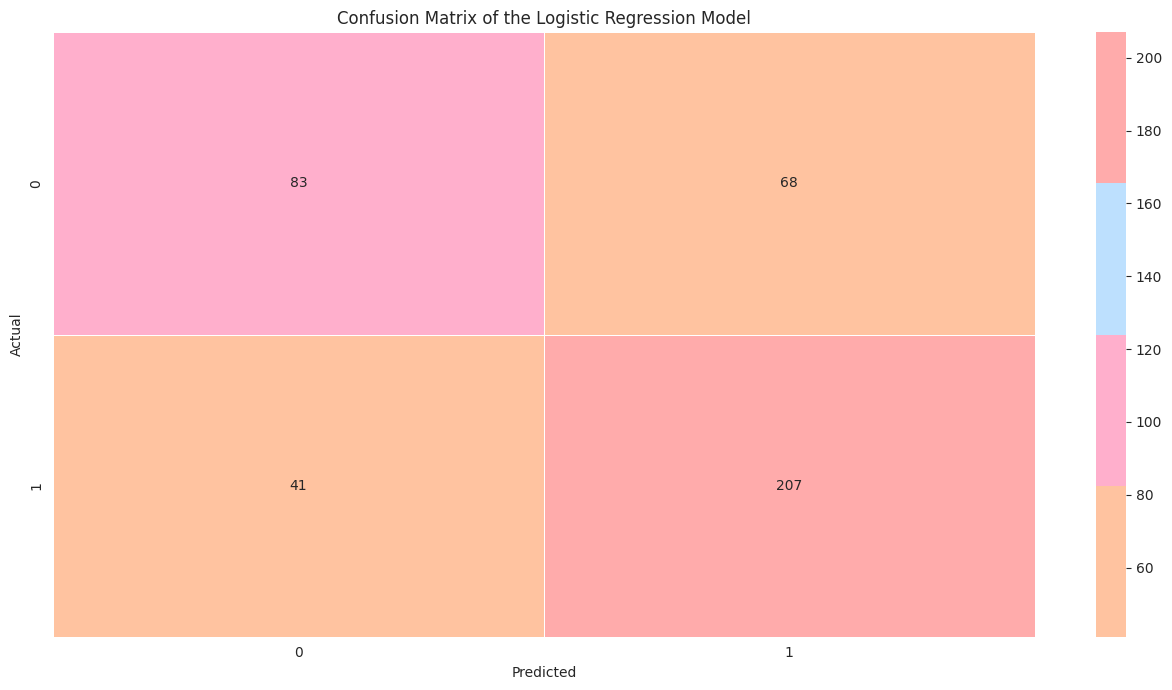

In [32]:
confusion_mat_log_fs = confusion_matrix(y_test_fs, y_pred_log_fs)
labels = ['0', '1']
confusion_mat_log_fs = pd.DataFrame(confusion_mat_log_fs, index=labels, columns=labels)
fig, ax = plt.subplots(figsize=(13, 7))
sns.heatmap(confusion_mat_log_fs, annot=True, fmt='d', cmap=cmap, cbar=True, linewidths=0.5, ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix of the Logistic Regression Model')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.tight_layout()
plt.show()

According to the confusion matrix, the model made 83 correct predictions for class 0 and 207 correct predictions for class 1. However, it also made 68 incorrect predictions for class 1 and 41 incorrect predictions for class 0.

### 2. Gaussian Naive Bayes

The second algorithm to be used initially is the Gaussian Naive Bayes.

Gaussian Naive Bayes (GNB) is a classification algorithm that assumes that the features of each class are independently distributed according to a Gaussian distribution. This means that the algorithm assumes that the features are not correlated with each other, and that each feature can be predicted independently of the other features.

In passive format, GNB is used to predict the probability that a new data point belongs to a particular class. This is done by calculating the mean and variance of the features for each class, and then using the Gaussian distribution to calculate the probability that the new data point belongs to each class.

Since features to be used have been selected above using Feature Selection techniques, they will be used to train the Gaussian Naive Bayes model.

In [35]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y, stratify=y, random_state=101, test_size=0.3)

In [36]:
# Define the pipeline
pipeline_gnb = Pipeline([
    ('gaussian_nb', GaussianNB()),
])

# Fit the pipeline to the training data
pipeline_gnb.fit(X_train_fs, y_train_fs)

# Generate predictions on the test data
y_pred_gnb = pipeline_gnb.predict(X_test_fs)

In [37]:
# Calculate evaluation metrics
acc_score_gnb = accuracy_score(y_test_fs, y_pred_gnb)
recall_gnb = recall_score(y_test_fs, y_pred_gnb)
precision_gnb = precision_score(y_test_fs, y_pred_gnb)
roc_auc_gnb = roc_auc_score(y_test_fs, y_pred_gnb)
f1_gnb = f1_score(y_test_fs, y_pred_gnb)
classification_rep_gnb = classification_report(y_test_fs, y_pred_gnb)


# Print the evaluation metrics
print(f'Accuracy score: {acc_score_gnb}')
print(f'Recall: {recall_gnb}')
print(f'Precision: {precision_gnb}')
print(f'ROC AUC: {roc_auc_gnb}')
print(f'F1 Score: {f1_gnb}')
print('\nClassification Report:\n', classification_rep_gnb)

Accuracy score: 0.6541353383458647
Recall: 0.5403225806451613
Precision: 0.8481012658227848
ROC AUC: 0.6906910916470839
F1 Score: 0.6600985221674878

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.84      0.65       151
           1       0.85      0.54      0.66       248

    accuracy                           0.65       399
   macro avg       0.69      0.69      0.65       399
weighted avg       0.73      0.65      0.66       399



In [ ]:
!pip install optuna
from optuna import create_study, trial
import optuna
from optuna import create_study
from optuna.samplers import TPESampler
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [39]:
# Define the objective function for Optuna
def objective(trial):
    # Define parameters to optimize with Optuna
    param_grid = {
        'var_smoothing': trial.suggest_float('var_smoothing', 1e-9, 1e-5),
        'priors': trial.suggest_categorical('priors', [None, [0.5, 0.5]]),
    }

    # Initialize the Gaussian Naive Bayes classifier with  parameters
    gnb_model = GaussianNB(**param_grid)

    # Initialize a Stratified K-Fold cross-validator
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=101)
    accuracy_scores = []

    # Perform cross-validation
    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Fit the model and generate predictions
        gnb_model.fit(X_train, y_train)
        y_pred = gnb_model.predict(X_val)

        # Calculate the accuracy score and add it to the list
        accuracy_scores.append(accuracy_score(y_val, y_pred))

    # Return the mean accuracy score as the objective value
    return np.mean(accuracy_scores)

# Create an Optuna study
sampler = TPESampler(seed=42)  # Use TPESampler for Bayesian optimization
study = create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=100)

# Get the best parameters and best score
best_params_gnb = study.best_params
best_score_gnb = study.best_value

print("Best parameters:", best_params_gnb)
print("Best score (mean accuracy):", best_score_gnb)

Best parameters: {'var_smoothing': 3.7460266483547775e-06, 'priors': None}
Best score (mean accuracy): 0.6280075187969925


In [40]:
gnb_model = GaussianNB(**best_params_gnb)

# Fit the model
gnb_model.fit(X_train, y_train)

# Generate predictions on the test data
y_pred_gnb = gnb_model.predict(X_test)

In [41]:
# Calculate evaluation metrics
acc_score_gnb = accuracy_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
roc_auc_gnb = roc_auc_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
classification_rep_gnb = classification_report(y_test, y_pred_gnb)


# Print the evaluation metrics
print(f'Accuracy score: {acc_score_gnb}')
print(f'Recall: {recall_gnb}')
print(f'Precision: {precision_gnb}')
print(f'ROC AUC: {roc_auc_gnb}')
print(f'F1 Score: {f1_gnb}')
print('\nClassification Report:\n', classification_rep_gnb)

Accuracy score: 0.6516290726817042
Recall: 0.5403225806451613
Precision: 0.8427672955974843
ROC AUC: 0.6873798333689383
F1 Score: 0.6584766584766585

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.83      0.64       151
           1       0.84      0.54      0.66       248

    accuracy                           0.65       399
   macro avg       0.68      0.69      0.65       399
weighted avg       0.72      0.65      0.65       399



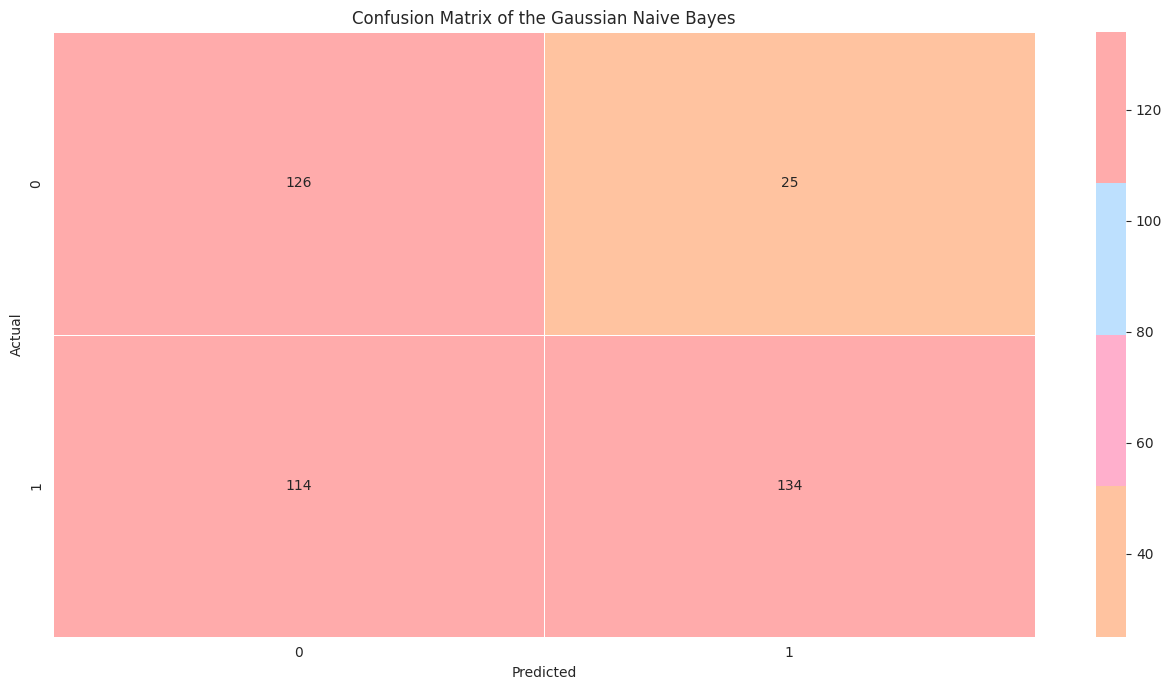

In [42]:
confusion_mat_gnb = confusion_matrix(y_test, y_pred_gnb)
labels = ['0', '1']
confusion_mat_gnb = pd.DataFrame(confusion_mat_gnb, index=labels, columns=labels)
fig, ax = plt.subplots(figsize=(13, 7))
sns.heatmap(confusion_mat_gnb, annot=True, fmt='d', cmap=cmap, cbar=True, linewidths=0.5, ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix of the Gaussian Naive Bayes')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.tight_layout()
plt.show()

According to the confusion matrix, the model made 126 correct predictions for class 0 and 134 correct predictions for class 1. However, it also made 25 incorrect predictions for class 1 and 114 incorrect predictions for class 0.

### 3. Neural Network Model

A neural network is a machine learning algorithm that is inspired by the structure and function of the human brain. It is made up of interconnected nodes, called neurons, that process information and send signals to each other.  
Neural networks are trained on data by adjusting the weights of the connections between neurons. The goal of training is to minimize the error of the network on the training data. Once the network is trained, it can be used to make predictions on new data.

In [43]:
# get input and output data
X = df.drop(['Name', 'TARGET_5Yrs'], axis=1)
y = df['TARGET_5Yrs']

In [44]:
# Define the numerical feature names
num_cols = X.columns

# Create a numerical pipeline for scaling and missing value imputation
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

# Combining the numerical pipeline with a column transformer
full_pipeline = ColumnTransformer(
    transformers=[
        ('numeric', num_pipeline, num_cols)
    ]
)

# Fitting the pipeline
X_ = full_pipeline.fit_transform(X)

# Create a DataFrame with the correct column names
X = pd.DataFrame(X_, columns=num_cols)

In [45]:
 # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Define and compile the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(19,)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Use a weighted binary crossentropy loss function
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True, label_smoothing=0.1), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=2)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
print(f'Accuracy: {accuracy_score(y_test, y_pred_binary)}')

Epoch 1/20
14/14 - 2s - loss: 1.7541 - accuracy: 0.6184 - val_loss: 1.6343 - val_accuracy: 0.6808 - 2s/epoch - 146ms/step
Epoch 2/20
14/14 - 0s - loss: 1.5810 - accuracy: 0.6667 - val_loss: 1.4736 - val_accuracy: 0.7042 - 152ms/epoch - 11ms/step
Epoch 3/20
14/14 - 0s - loss: 1.4228 - accuracy: 0.6890 - val_loss: 1.3469 - val_accuracy: 0.6995 - 281ms/epoch - 20ms/step
Epoch 4/20
14/14 - 0s - loss: 1.2997 - accuracy: 0.7079 - val_loss: 1.2261 - val_accuracy: 0.7136 - 156ms/epoch - 11ms/step
Epoch 5/20
14/14 - 0s - loss: 1.1954 - accuracy: 0.6996 - val_loss: 1.1301 - val_accuracy: 0.6995 - 158ms/epoch - 11ms/step
Epoch 6/20
14/14 - 0s - loss: 1.1080 - accuracy: 0.6949 - val_loss: 1.0478 - val_accuracy: 0.7089 - 173ms/epoch - 12ms/step
Epoch 7/20
14/14 - 0s - loss: 1.0269 - accuracy: 0.6879 - val_loss: 0.9789 - val_accuracy: 0.7230 - 166ms/epoch - 12ms/step
Epoch 8/20
14/14 - 0s - loss: 0.9657 - accuracy: 0.6996 - val_loss: 0.9207 - val_accuracy: 0.7277 - 195ms/epoch - 14ms/step
Epoch 9/20

In [47]:
# Calculate evaluation metrics for neural network model
acc_score_nn = accuracy_score(y_test, y_pred_binary)
recall_nn = recall_score(y_test, y_pred_binary)
precision_nn = precision_score(y_test, y_pred_binary)
roc_auc_nn = roc_auc_score(y_test, y_pred_binary)
f1_nn = f1_score(y_test, y_pred_binary)
classification_rep_nn = classification_report(y_test, y_pred_binary)


# Print the evaluation metrics
print(f'Accuracy score: {acc_score_nn}')
print(f'Recall: {recall_nn}')
print(f'Precision: {precision_nn}')
print(f'ROC AUC: {roc_auc_nn}')
print(f'F1 Score: {f1_nn}')
print('\nClassification Report:\n', classification_rep_nn)

Accuracy score: 0.7443609022556391
Recall: 0.8033707865168539
Precision: 0.8125
ROC AUC: 0.714185393258427
F1 Score: 0.8079096045197739

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.62      0.62        88
           1       0.81      0.80      0.81       178

    accuracy                           0.74       266
   macro avg       0.71      0.71      0.71       266
weighted avg       0.75      0.74      0.75       266



##### **Comparing Evaluation Metrics of the Models**

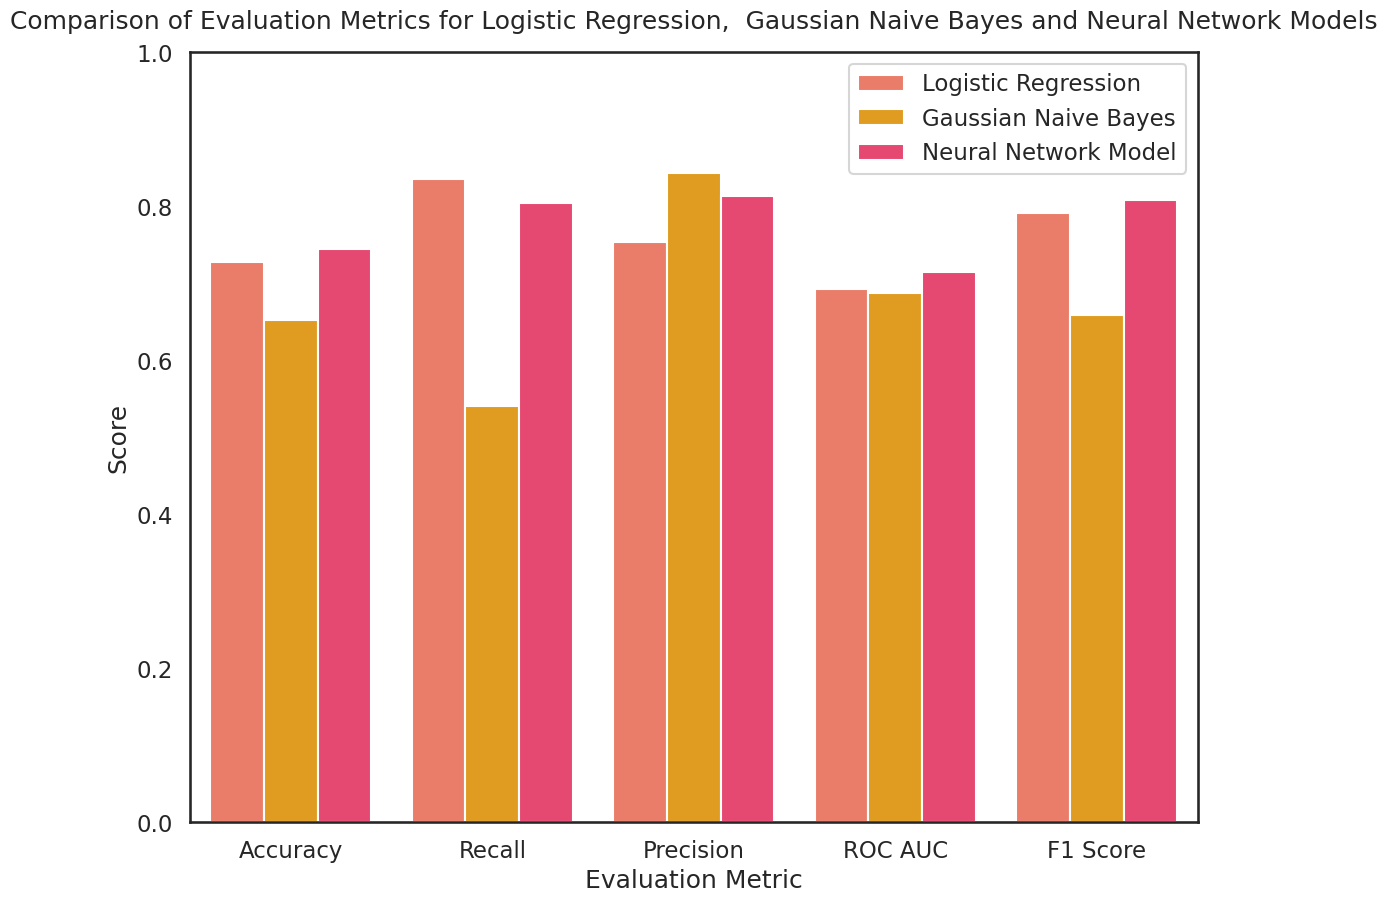

In [62]:
# Create a list of the evaluation metrics for each model
model_metrics = {
    "Model": ["Logistic Regression", "Logistic Regression", "Logistic Regression", "Logistic Regression", "Logistic Regression",
              "Gaussian Naive Bayes", "Gaussian Naive Bayes", "Gaussian Naive Bayes", "Gaussian Naive Bayes", "Gaussian Naive Bayes",
              "Neural Network Model", "Neural Network Model", "Neural Network Model", "Neural Network Model", "Neural Network Model"],
    "Metric": ["Accuracy", "Recall", "Precision", "ROC AUC", "F1 Score",
               "Accuracy", "Recall", "Precision", "ROC AUC", "F1 Score",
               "Accuracy", "Recall", "Precision", "ROC AUC", "F1 Score"],
    "Score": [acc_score_log_fs, recall_log_fs, precision_log_fs, roc_auc_log_fs, f1_log_fs,
              acc_score_gnb, recall_gnb, precision_gnb, roc_auc_gnb, f1_gnb,
             acc_score_nn,  recall_nn, precision_nn,  roc_auc_nn, f1_nn, ]
}
model_metrics_df = pd.DataFrame(model_metrics)
plt.figure(figsize=(13, 10))
sns.barplot(x="Metric", y="Score", hue="Model", data=model_metrics_df, palette=my_palette)
plt.ylim(0, 1)
plt.xlabel("Evaluation Metric")
plt.ylabel("Score")
plt.title("Comparison of Evaluation Metrics for Logistic Regression,  Gaussian Naive Bayes and Neural Network Models", y=1.02)
plt.legend(loc="upper right")
plt.show()

## Conclusion
The binary classification project here was a really exciting one where we were able to build predictive models which could successfully gauge if a player will last 5 years in the NBA from a set of given features. <br><br>

**Highlights**

1. Data Exploration and Preparation: The dataset was thoroughly examined and readied, with the features defined and understood, checking for missing values, the selection of relevant features, and the scaling of data to enhance model performance.

2. Exploratory Data Analysis (EDA): An overview of the EDA aspect involved a comprehensive examination of the dataset's characteristics, distribution, and relationships among variables to gain insights into the data's underlying patterns.

3. Machine Learning & Deep Learning Modelling: Machine learning & Neural Network algorithms including Logistic Regression and Gaussian Naive Bayes were utilized to train the predictive model. The models demonstrated impressive predictive performances confirming their capabilities of understanding the data's underlying patterns.  

4. Evaluation Metrics: To gauge the model's performance,  various essential classification metrics, were employed such as classification report, accuracy, precision, recall, ROC AUC and recall scores. A confusion matrix heatmap was also used to verify the models' predictive performances. The Neural Network model, however demonstrated the best results across the vast evaluation metrics used.

5. Cross-Validation: Cross-validation techniques were employed to assess the model's stability and consistency in diverse data subsets, ultimately providing a more robust evaluation.

6. Efficient Hyperparameter Search: Optuna was used for efficient and effective hyperparameter optimization. It automated the search process, making it easier to find the best set of hyperparameters for the models.
<br>

**Further Improvements**

While the models have demonstrated competence, it could be further improved by:

- Feature Engineering: The exploration of additional feature engineering techniques to create new, more informative features may enhance the model's predictive capacity.

- Outlier Handling: Identifying and addressing outliers in the dataset may further improve model accuracy.

- Ensemble Models: Experimenting with ensemble methods like Random Forest, Extreme Gradient Boosting, or stacking multiple models could be considered to improve predictive power.

- Advanced Neural Network Architectures: Experimenting with more complex neural network architectures or deep learning techniques could also be considered to enhance the model's predictive performances.